In [41]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime
months =[datetime(2019, imon, 1) for imon in np.arange(1,12+1)]
month_str = [date_obj.strftime('%b') for date_obj in months]
m_str = [w[0] for w in month_str];

# from mpl_toolkits.basemap import basemap

In [42]:
hdpd = pd.read_csv('points_with_gridIds_reLabel.csv')
hd = pd.DataFrame.to_xarray(hdpd)
# hd = xr.Dataset.from_dataframe(hdpd)
hd
# hd.groupby('index.key')
print(hdpd.groupby(by = 'key', axis = 1))

In [43]:
# forCount = hdpd['month','key']
size = hd.groupby('key').count()
# bigs = size.keys()
# bigs.values
sorted = size.sortby('day', ascending = False)
sorted.key[:10]

<xarray.DataArray 'key' (key: 10)>
array(['             NADINE-2012', '               KYLE-2002',
       '             LESLIE-2018', '               JOSE-2017',
       '           FLORENCE-2018', '            MARILYN-1995',
       '               IVAN-2004', '            ALBERTO-2000',
       '             HARVEY-2017', '           NICHOLAS-2003'], dtype=object)
Coordinates:
  * key      (key) object '             NADINE-2012' ... '           NICHOLAS...

In [44]:
hd['Lon'] = -1*hd['Lon']

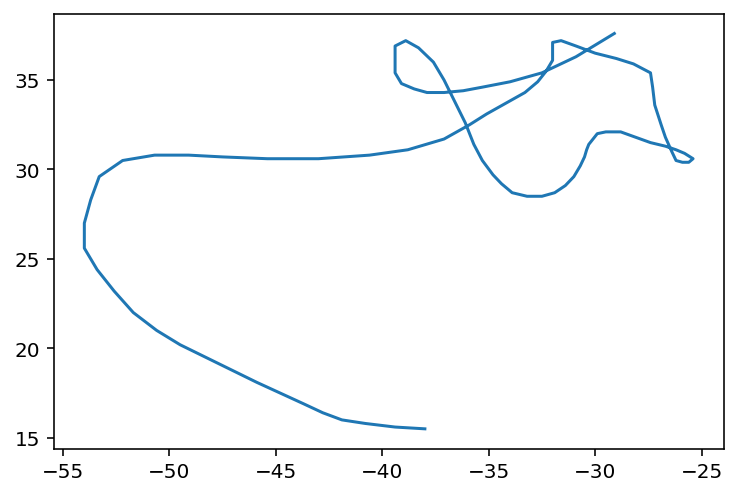

In [45]:
j = hd.get(['key', 'Lat', 'Lon'])
nad = j.where(j['key'] == sorted.key[0], drop = True)
# lat = nad['Lat'].values
# lon = nad['Lon'].values
# lon = [x * -1 for x in lon]
# xpt

plt.plot(nad['Lon'].values, nad['Lat'].values)

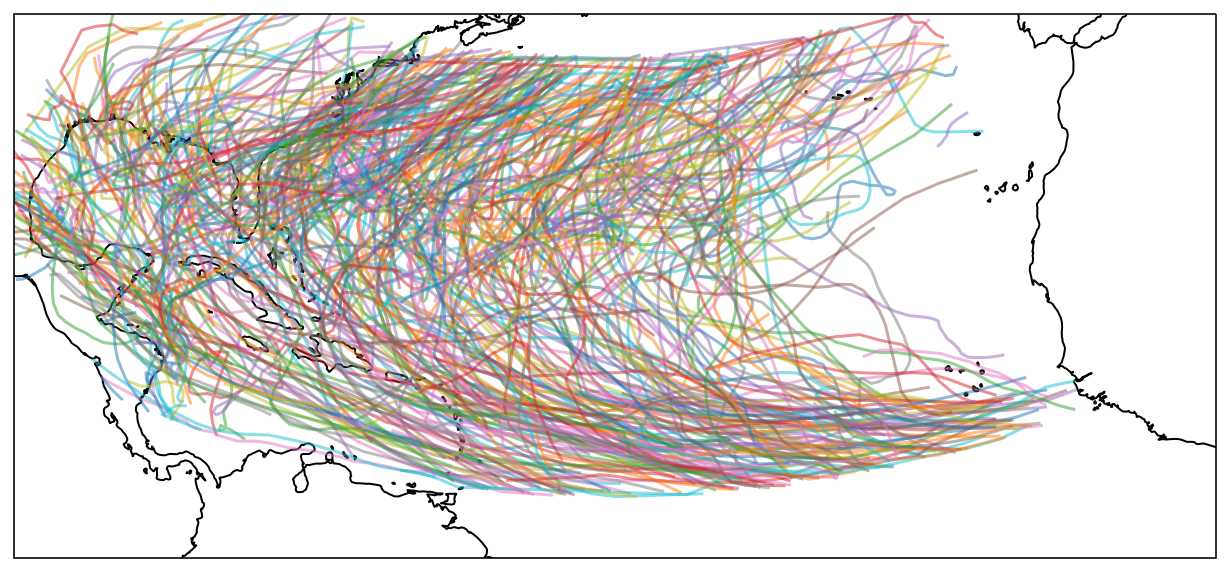

In [46]:
proj_map = ccrs.LambertConformal(central_longitude=-50, central_latitude=27.5)
proj_dta = ccrs.PlateCarree()  # the data's projection

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection=proj_map)

extent = [-90, -10, 5, 40]

for i in range(0,481):
    th = j.where(j['key'] == sorted.key[i], drop = True)
    plt.plot(th['Lon'].values, th['Lat'].values, transform=proj_dta, alpha = 0.5)

ax.coastlines();
ax.set_extent(extent)

In [16]:
myindices = []

year = str(2005)
for i in range(len(hd['key'])):
    if hd['key'].values[i][-4:] == year:
        myindices.append(i)
            
lat05 = hd.Lat[myindices]
lon05 = hd.Lon[myindices]
key05 = hd.key[myindices]

myAr = np.array((key05, lat05, lon05))
myXr = xr.DataArray(myAr)
myXr

<xarray.DataArray (dim_0: 3, dim_1: 771)>
array([['             ARLENE-2005', '             ARLENE-2005',
        '             ARLENE-2005', ..., '            EPSILON-2005',
        '            EPSILON-2005', '            EPSILON-2005'],
       [16.9, 17.4, 18.2, ..., 31.1, 30.8, 30.1],
       [-84.0, -83.9, -83.9, ..., -52.5, -53.5, -54.2]], dtype=object)
Dimensions without coordinates: dim_0, dim_1

No handles with labels found to put in legend.


<Figure size 1728x720 with 0 Axes>

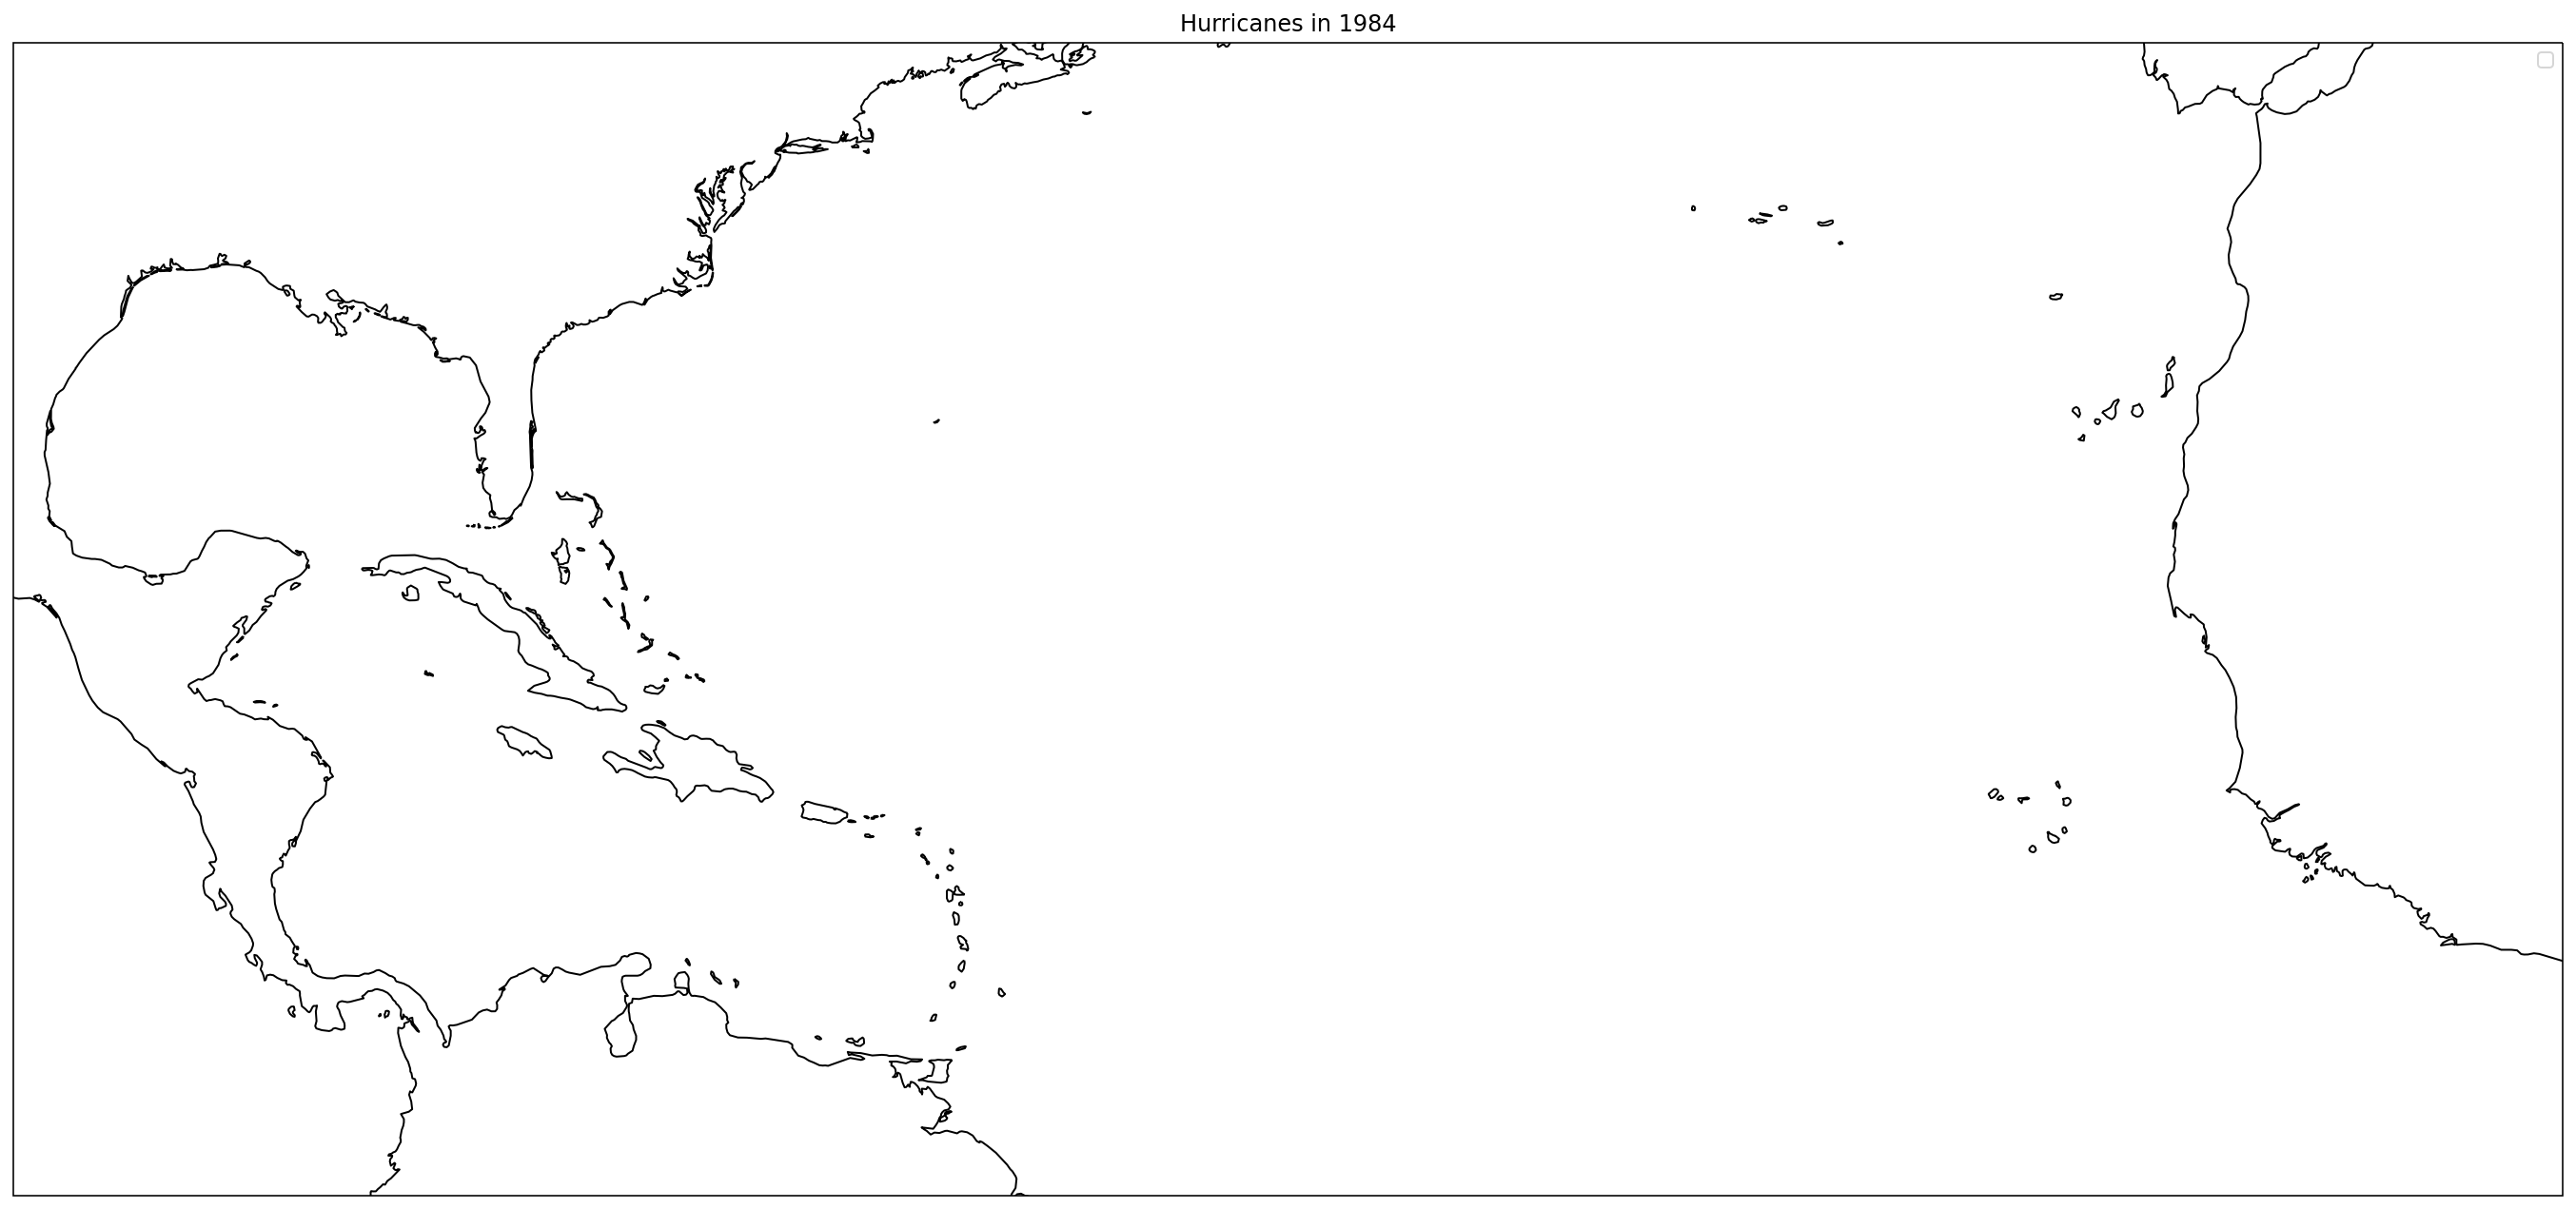

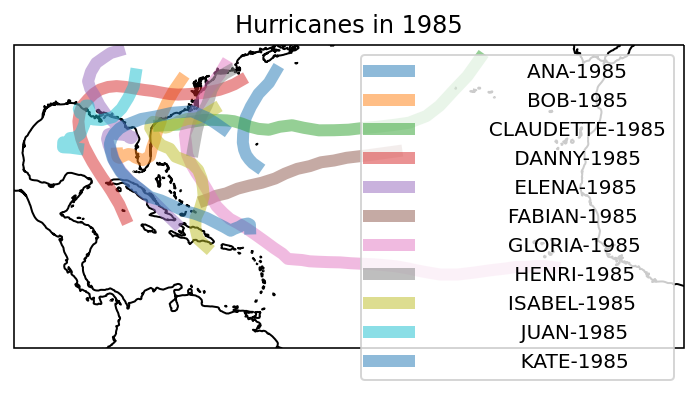

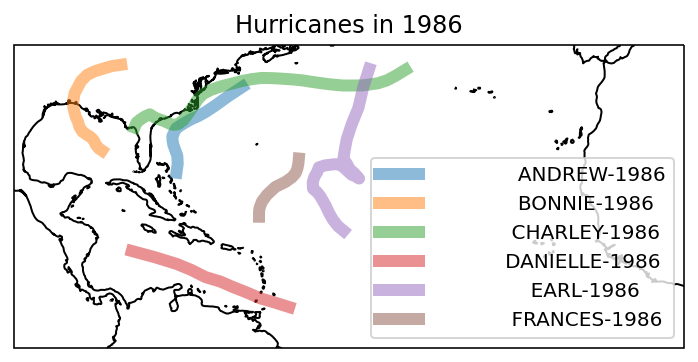

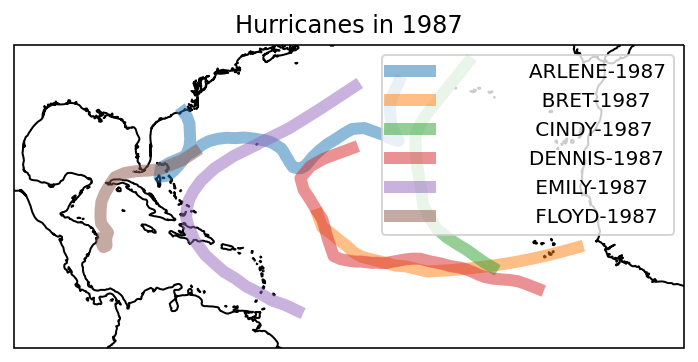

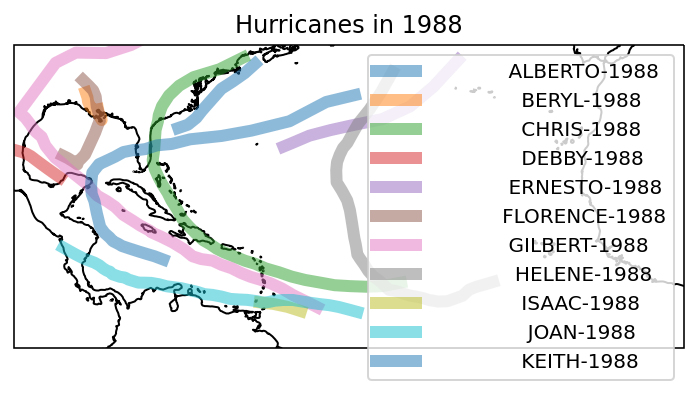

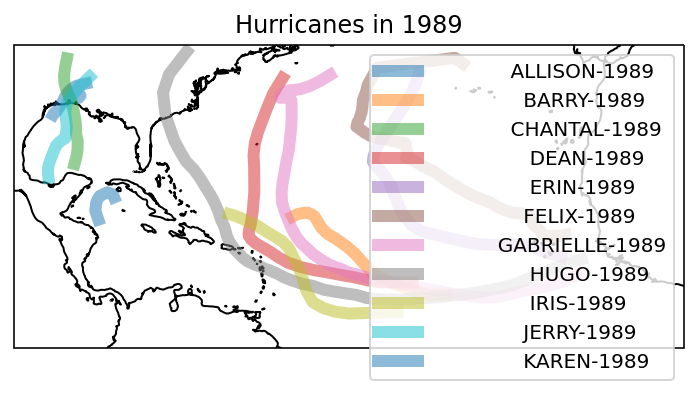

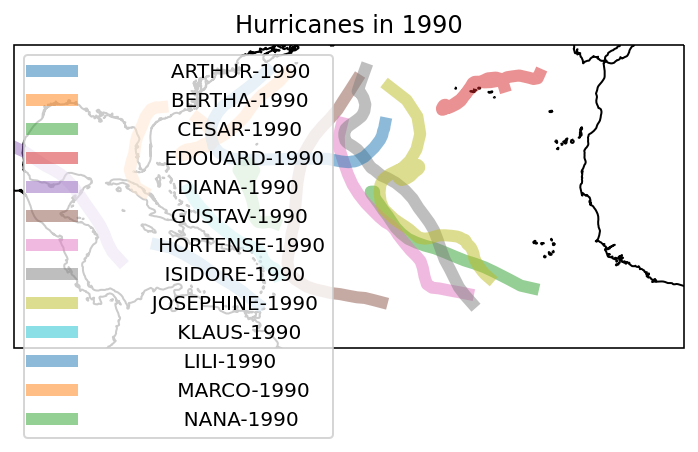

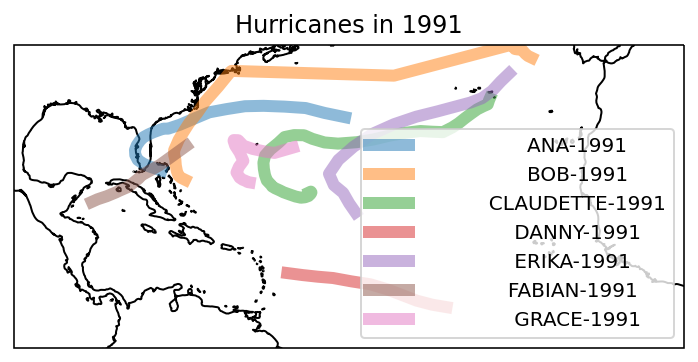

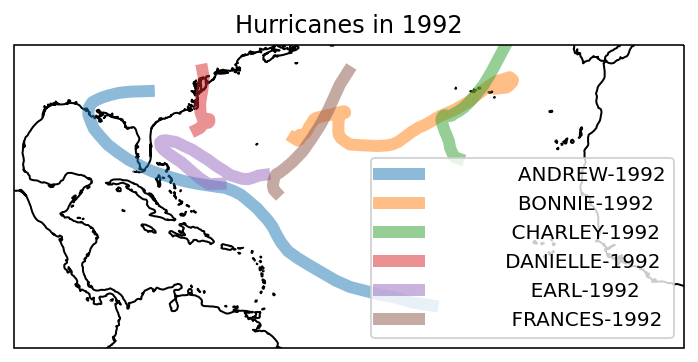

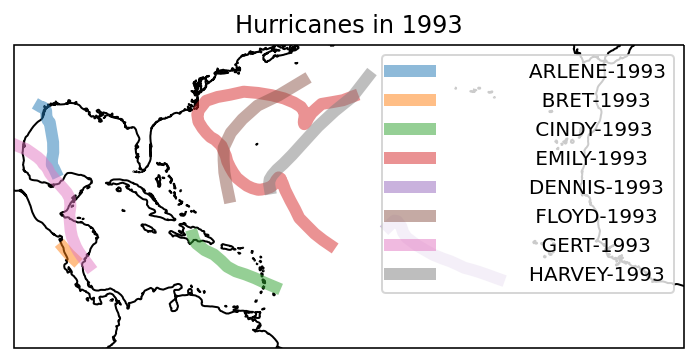

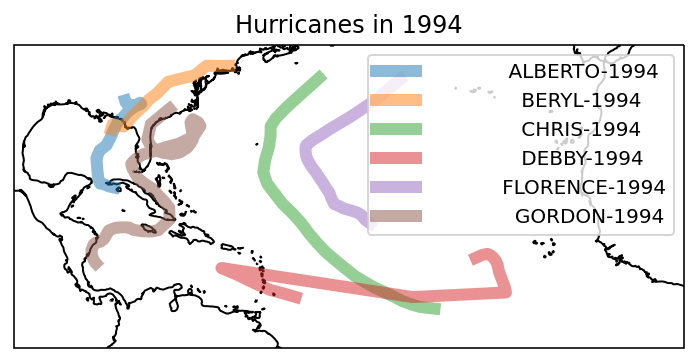

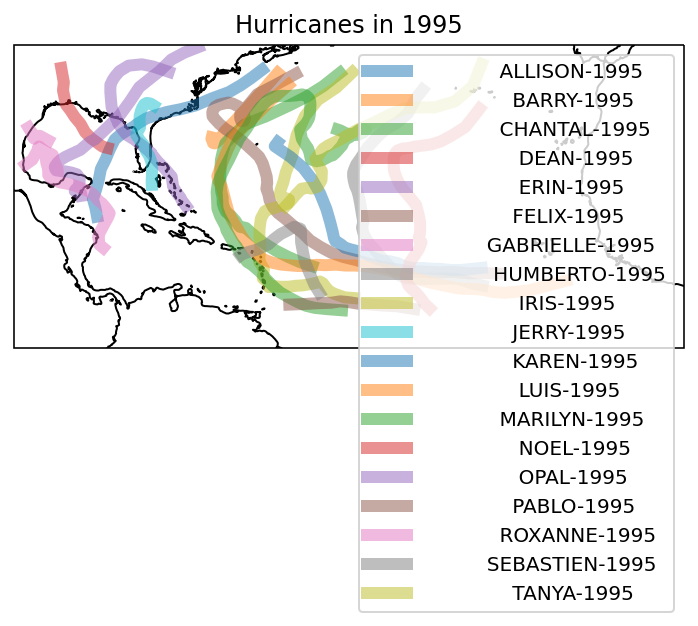

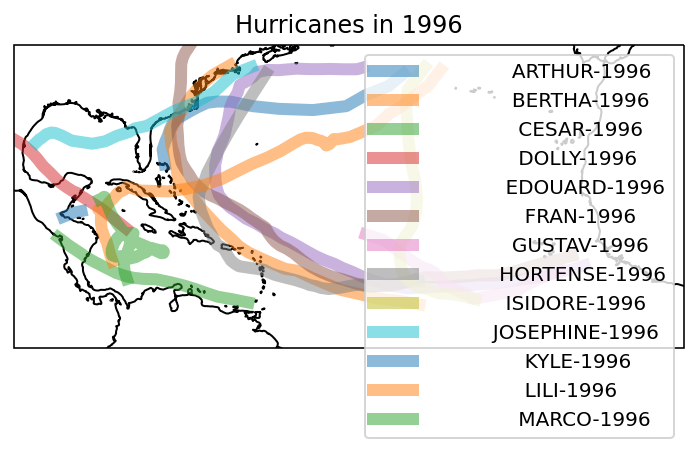

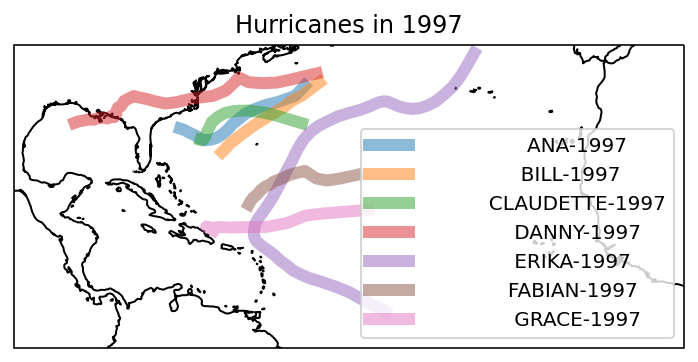

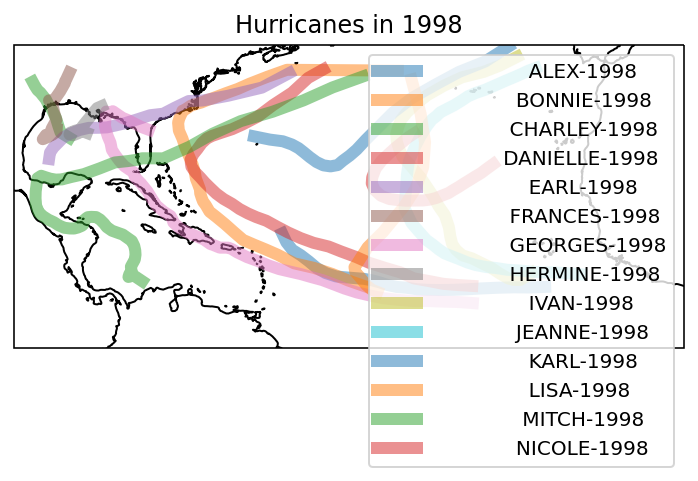

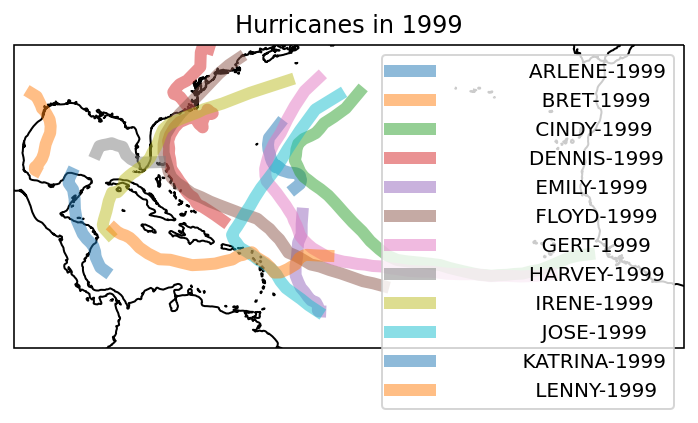

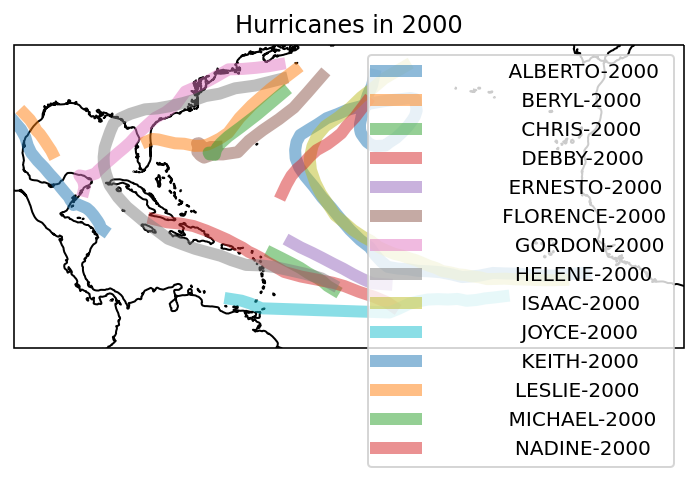

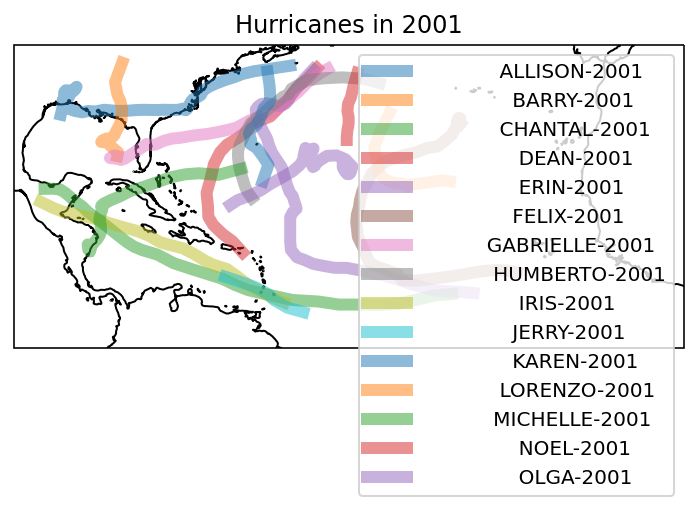

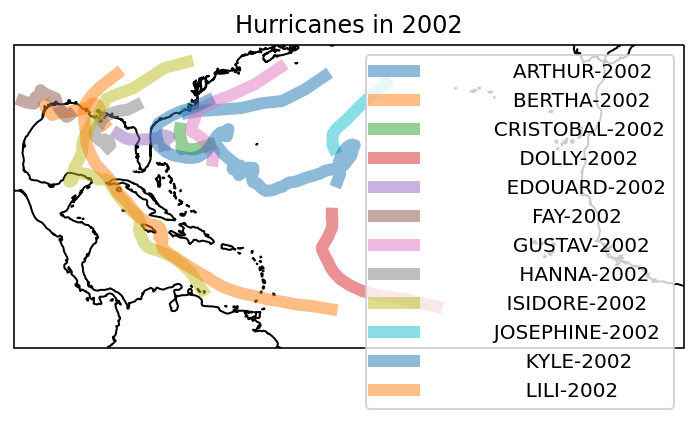

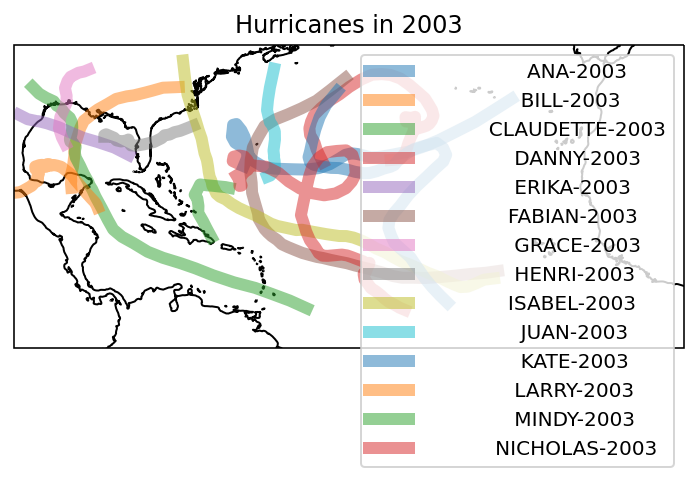

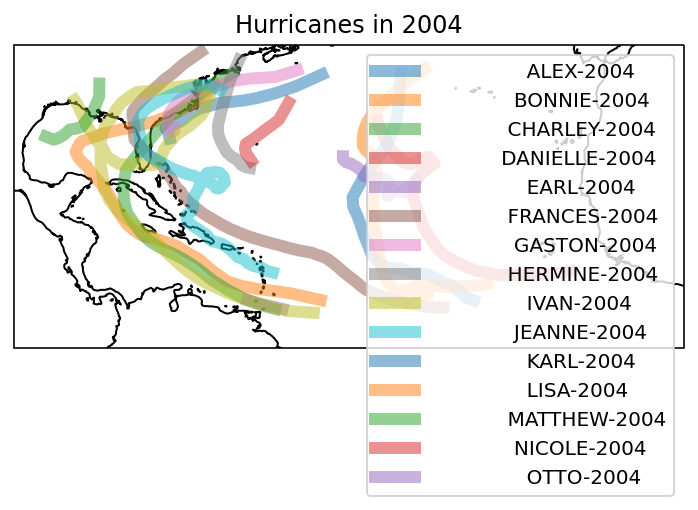

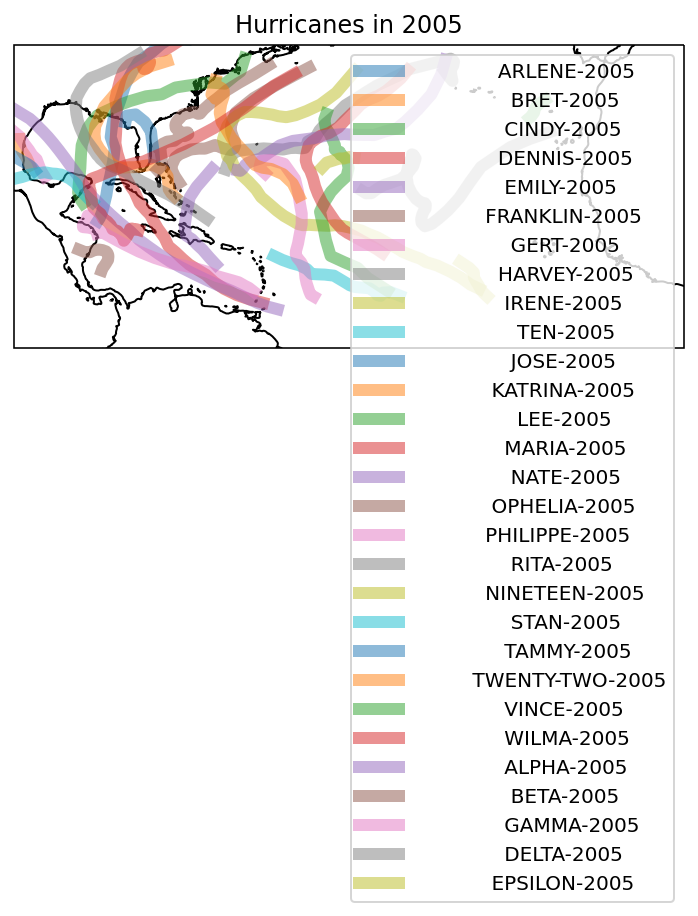

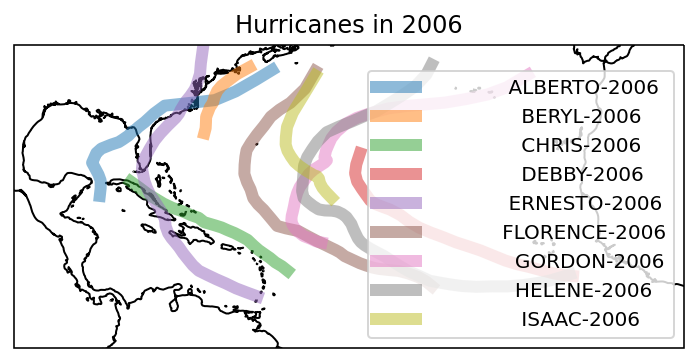

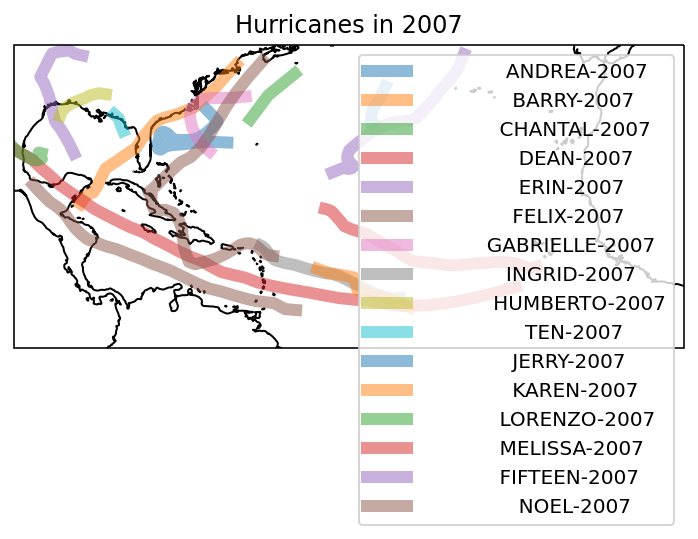

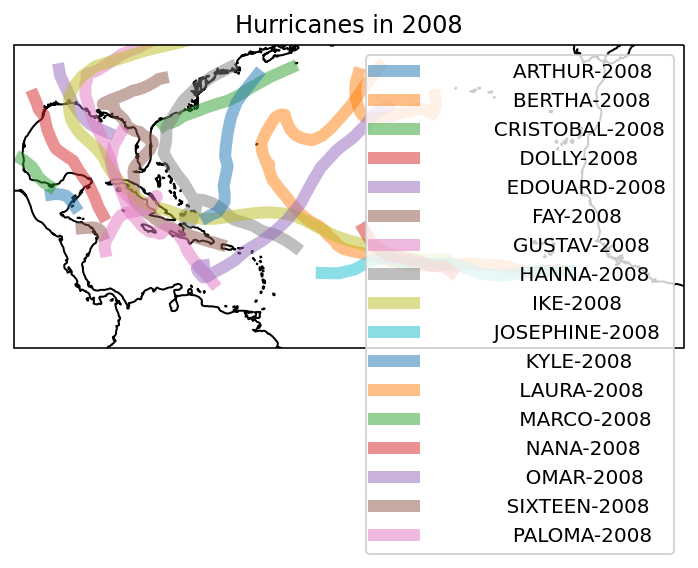

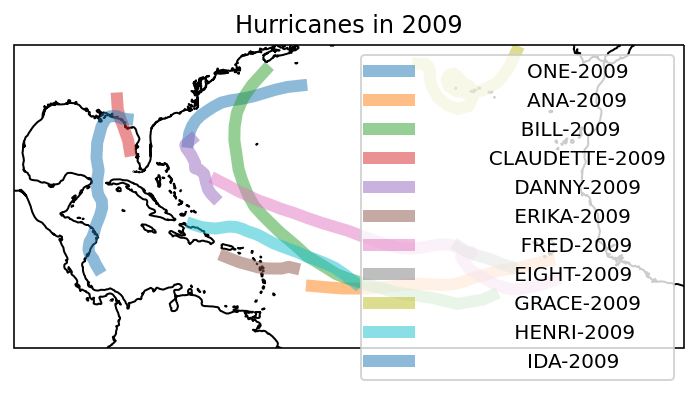

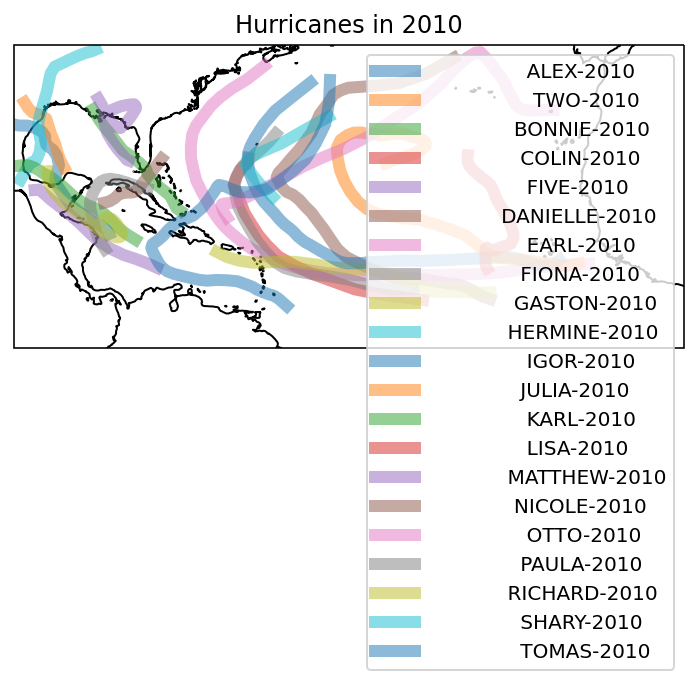

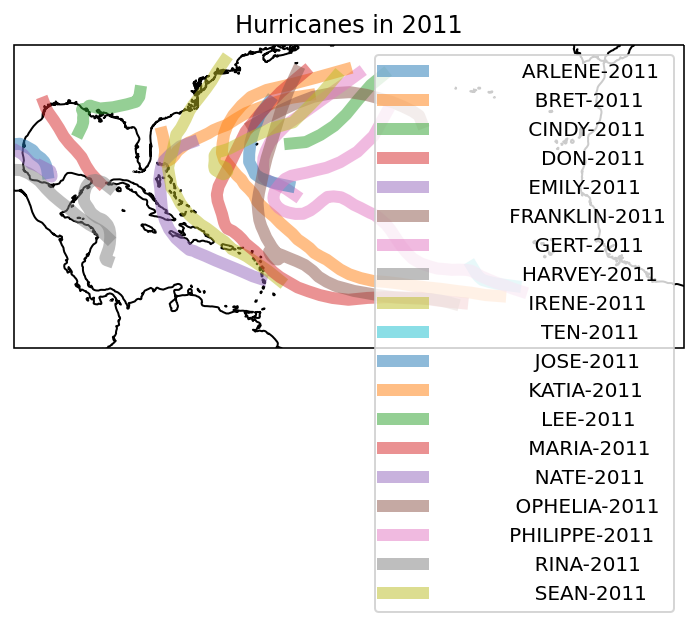

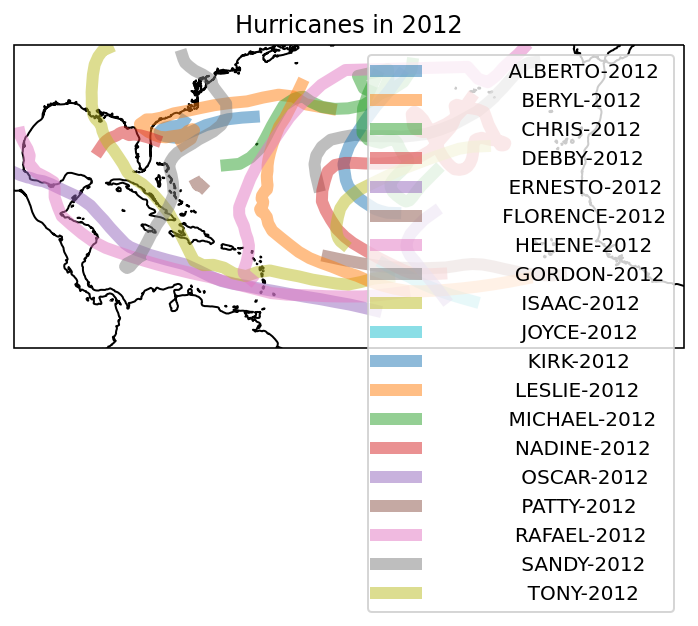

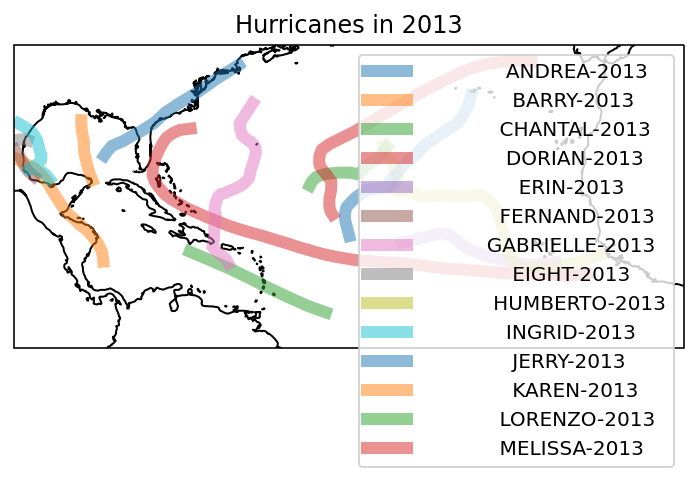

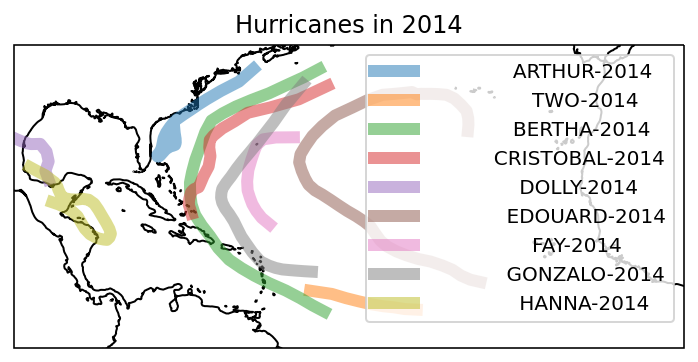

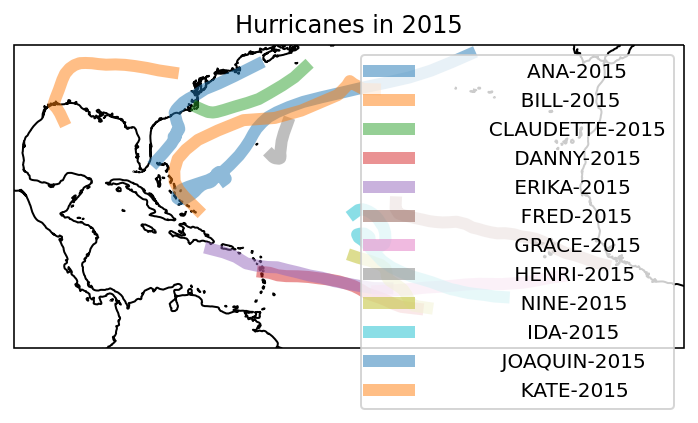

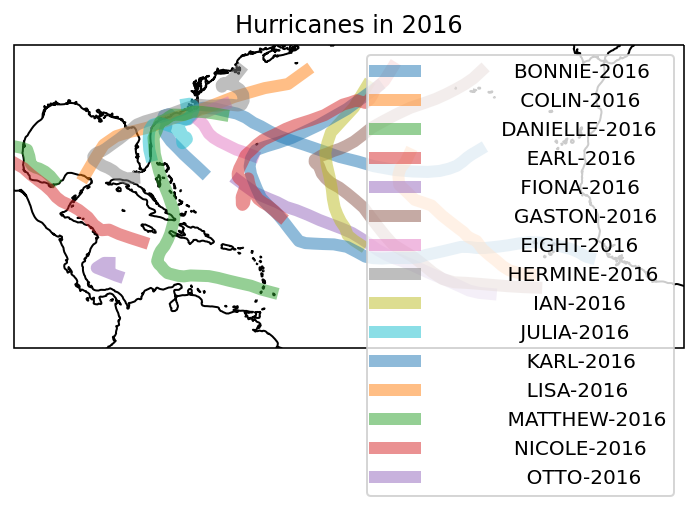

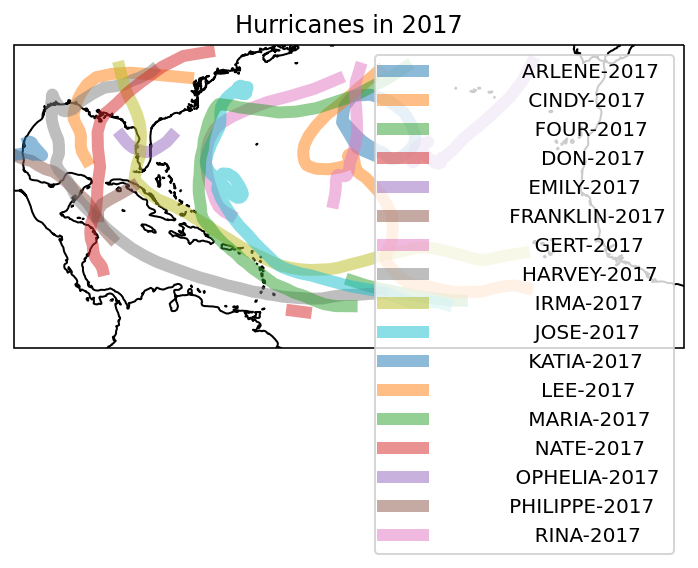

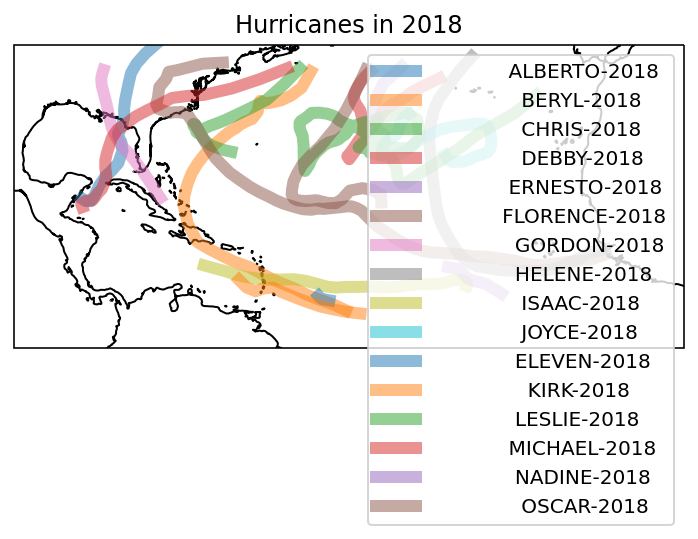

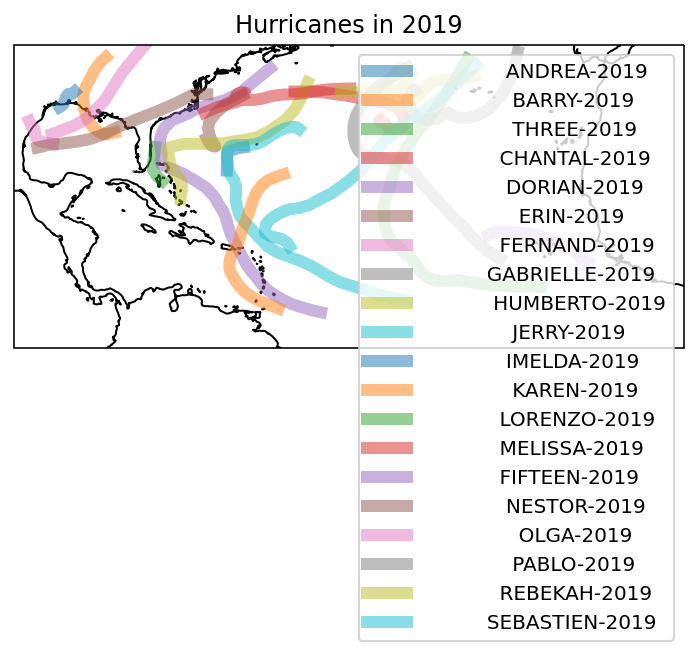

In [15]:
proj_map = ccrs.LambertConformal(central_longitude=-50, central_latitude=27.5)
proj_dta = ccrs.PlateCarree()  # the data's projection
fig = plt.figure(figsize=(24,10))
# ax = plt.subplot(projection=proj_map)

# ax = plt.subplot(37, 1, 1, projection = proj_map)
extent = [-90, -10, 5, 40]


#fig = plt.figure(figsize=(24,370))
ig, axs = plt.subplots(37, 1, figsize=(24,370))
for j, i in enumerate(range(1984,2020)):
    myindices = []

    ax = axs[j]
    ax = plt.axes(projection = proj_map)

    #ax = plt.subplot(i-1983, 1, 1, projection = proj_map)

    year = str(i)
    for i in range(len(hd['key'])):
        if hd['key'].values[i][-4:] == year:
            myindices.append(i)

    hd['key'][myindices]
    shortInd = []
    for i in hd['key'][myindices]:
        if i not in shortInd:
            shortInd.append(i)

    for i in range(len(shortInd)):
        selHur = hd.where(hd['key'] == shortInd[i], drop = True)
        if year != '1984':
            plt.plot(selHur['Lon'].values, selHur['Lat'].values, transform=proj_dta, linewidth = 6, alpha = 0.5, label = shortInd[i].values)

    ax.set_title("Hurricanes in {}".format(year))
    ax.coastlines();
    ax.set_extent(extent)
    ax.legend()
    plt.show()

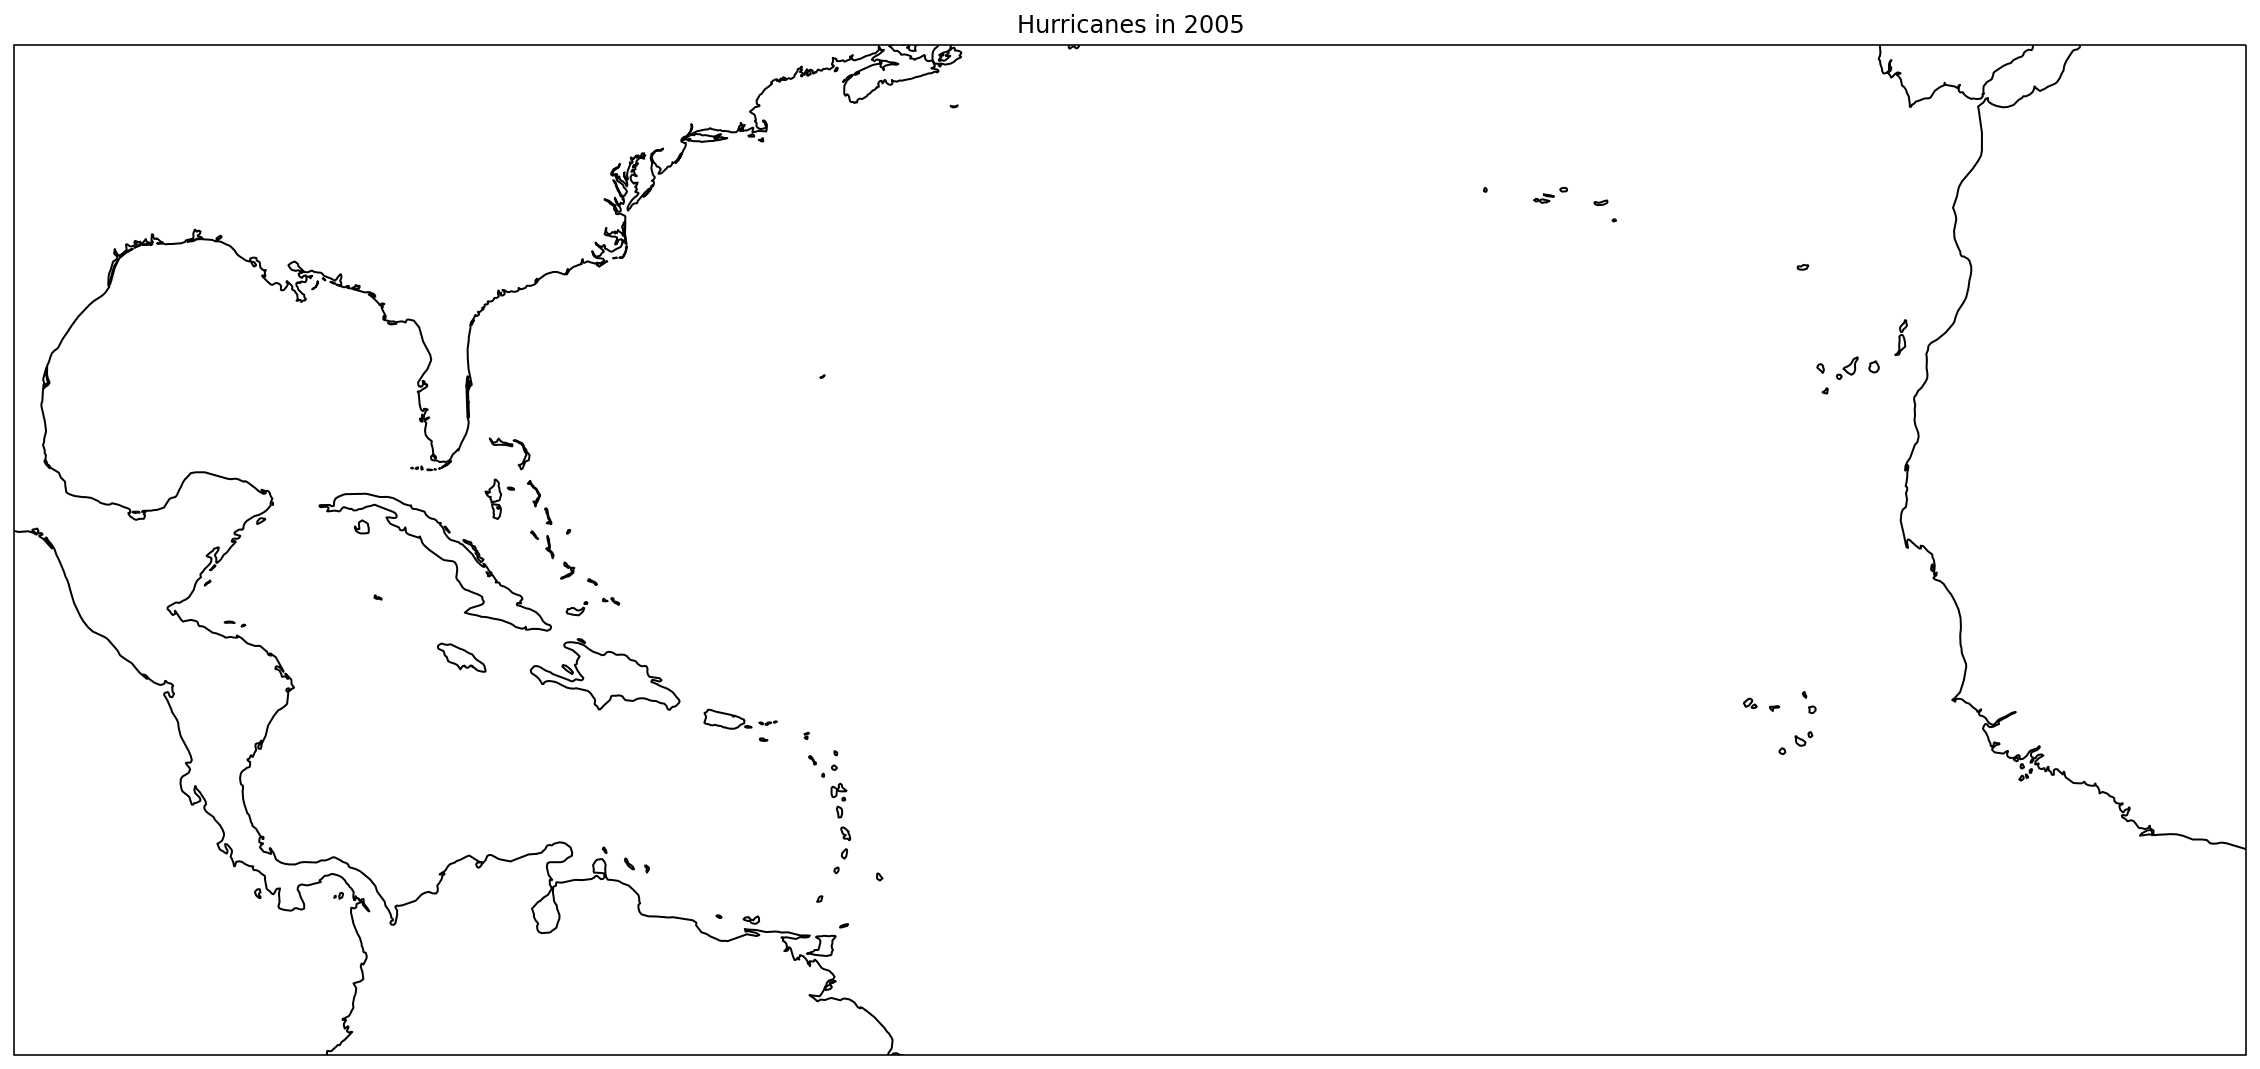

In [88]:
proj_map = ccrs.LambertConformal(central_longitude=-50, central_latitude=27.5)
proj_dta = ccrs.PlateCarree()  # the data's projection
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(projection=proj_map)
extent = [-90, -10, 5, 40]

# plt.plot(expArr[0],expArr[1], transform=proj_dta, linewidth = 6, alpha = 0.5)

myData = pd.DataFrame(expArr, columns = ['Lon', 'Lat', 'Hurricane'])

ax.set_title("Hurricanes in {}".format(year))
ax.coastlines();
ax.set_extent(extent)
myData.groupby('Hurricane')